In [ ]:
# Mount google drive to access the data file
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Change working dir  
!ls
import os
os.chdir('/content/gdrive/MyDrive/4995_Final_Project')
!ls

gdrive	sample_data
ANN_Training.ipynb  final.csv


In [ ]:
# Load CSV file data and drop the unwanted columns
import pandas as pd
raw_df = pd.read_csv("./final.csv")
cols_to_drop = ['ID', 'Name', 'Host ID', 'Host Since']
df = raw_df.drop(cols_to_drop, axis=1)
print(df.head())

   Host Response Time  Host Response Rate  Host Listings Count  \
0                 4.0           100.00000                  1.0   
1                 4.0           100.00000                  1.0   
2                 0.0            93.61078                  1.0   
3                 4.0            95.00000                  2.0   
4                 4.0            95.00000                  2.0   

   Host Total Listings Count        City       State     Zipcode     Country  \
0                        1.0  181.364666  158.590834  133.040921  156.265711   
1                        1.0  120.574380  158.590834  106.187970  156.265711   
2                        1.0  112.772201  158.590834  108.543103  156.265711   
3                        2.0  128.581522  128.386989  145.590164  156.265711   
4                        2.0  128.581522  128.386989  145.590164  156.265711   

   Property Type  Room Type  ...  carbon monoxide detector  \
0     159.950205        0.0  ...                         1  

In [ ]:
# Pre-process
import numpy as np
from scipy.stats import skew

#log transform skewed numeric features:
numeric_feats = df.dtypes[df.dtypes != 'object'].index
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna()))
#compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

df[skewed_feats] = np.log1p(df[skewed_feats])
print(df.head())

   Host Response Time  Host Response Rate  Host Listings Count  \
0                 4.0           100.00000             0.693147   
1                 4.0           100.00000             0.693147   
2                 0.0            93.61078             0.693147   
3                 4.0            95.00000             1.098612   
4                 4.0            95.00000             1.098612   

   Host Total Listings Count      City       State   Zipcode     Country  \
0                   0.693147  5.206008  158.590834  4.898145  156.265711   
1                   0.693147  4.800526  158.590834  4.674584  156.265711   
2                   0.693147  4.734198  158.590834  4.696318  156.265711   
3                   1.098612  4.864310  128.386989  4.987641  156.265711   
4                   1.098612  4.864310  128.386989  4.987641  156.265711   

   Property Type  Room Type  ...  carbon monoxide detector  \
0     159.950205        0.0  ...                         1   
1     177.112083      

In [ ]:
# Train / test dataset split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Separating X and y
X = df.drop('Price', axis=1)
y = df.Price

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               20352     
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 119,425
Trainable params: 119,425
Non-trainable params: 0
_________________________________________________________________
None


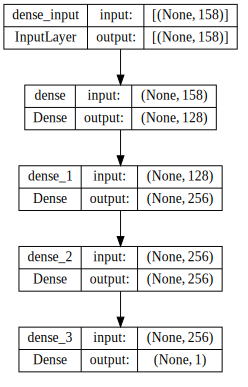

In [ ]:
# Building the model
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

nn2 = models.Sequential()
nn2.add(layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn2.summary())

# Visualising the neural network
SVG(model_to_dot(nn2, show_layer_names=True, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

In [ ]:
# Training the model
import time

nn2_start = time.time()

nn2_history = nn2.fit(X_train,
            y_train,
            epochs=100,
            batch_size=256,
            validation_split = 0.1)

nn2_end = time.time()

print(f"Time taken to run: {round((nn2_end - nn2_start)/60,1)} minutes")

Epoch 1/100
721/721 [==============================] - 3s 4ms/step - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.2089 - val_mean_squared_error: 0.2089
Epoch 2/100
721/721 [==============================] - 2s 3ms/step - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.2105 - val_mean_squared_error: 0.2105
Epoch 3/100
721/721 [==============================] - 2s 3ms/step - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.2094 - val_mean_squared_error: 0.2094
Epoch 4/100
721/721 [==============================] - 3s 4ms/step - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.2104 - val_mean_squared_error: 0.2104
Epoch 5/100
721/721 [==============================] - 4s 5ms/step - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.2085 - val_mean_squared_error: 0.2085
Epoch 6/100
721/721 [==============================] - 2s 3ms/step - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.2110 - val_mean_squared_error: 0.2110
Epoch 7/100
721/721 [=

6408/6408 [==============================] - 11s 2ms/step
Training MSE: 0.0428
Validation MSE: 0.2125

Training MAE: 0.1396
Validation MAE: 0.3434

Training r2: 0.9183
Validation r2: 0.5978


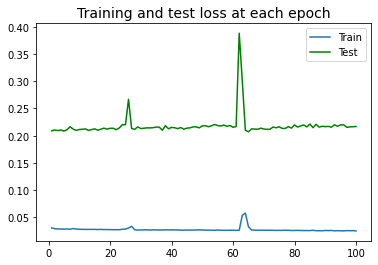

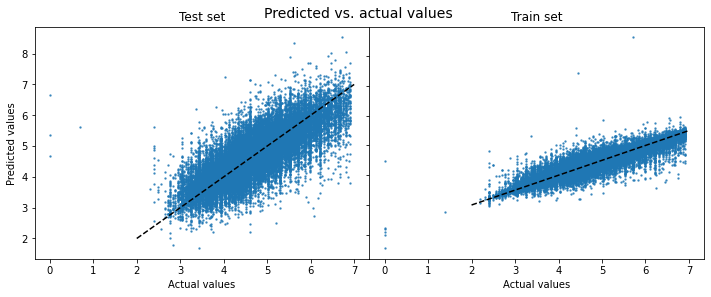

In [ ]:
# Model Evaluation and visualization
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(nn2_history)
def nn_model_evaluation(model, history, skip_epochs=0, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    """
    For a given neural network model that has already been fit, prints for the train and tests sets the MSE and r squared
    values, a line graph of the loss in each epoch, and a scatterplot of predicted vs. actual values with a line
    representing where predicted = actual values. 
    """

    # MSE and r squared values
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
    print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))

    print("\nTraining MAE:", round(mean_absolute_error(y_train, y_train_pred),4))
    print("Validation MAE:", round(mean_absolute_error(y_test, y_test_pred),4))

    print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
    print("Validation r2:", round(r2_score(y_test, y_test_pred),4))
    
    # Line graph of losses
    model_results = history.history
    plt.plot(list(range((skip_epochs+1),len(model_results['loss'])+1)), model_results['loss'][skip_epochs:], label='Train')
    plt.plot(list(range((skip_epochs+1),len(model_results['val_loss'])+1)), model_results['val_loss'][skip_epochs:], label='Test', color='green')
    plt.legend()
    plt.title('Training and test loss at each epoch', fontsize=14)
    plt.show()
    
    # Scatterplot of predicted vs. actual values
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
    plt.subplots_adjust(top=0.93, wspace=0)
    ax1.scatter(y_test, y_test_pred, s=2, alpha=0.7)
    ax1.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
    ax1.set_title('Test set')
    ax1.set_xlabel('Actual values')
    ax1.set_ylabel('Predicted values')
    
    ax2.scatter(y_train, y_train_pred, s=2, alpha=0.7)
    ax2.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
    ax2.set_title('Train set')
    ax2.set_xlabel('Actual values')
    ax2.set_ylabel('')
    ax2.set_yticklabels(labels='')
    
    plt.show()

nn_model_evaluation(nn2, nn2_history)

200/200 [==============================] - 0s 1ms/step


Permutation explainer:   7%|▋         | 7/100 [00:00<?, ?it/s]

216/216 [==============================] - 0s 2ms/step


Permutation explainer:   9%|▉         | 9/100 [00:12<01:23,  1.09it/s]

214/214 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█         | 10/100 [00:14<02:05,  1.40s/it]

196/196 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█         | 11/100 [00:16<02:03,  1.39s/it]

236/236 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█▏        | 12/100 [00:18<02:13,  1.52s/it]

206/206 [==============================] - 0s 1ms/step


Permutation explainer:  13%|█▎        | 13/100 [00:19<02:22,  1.64s/it]

188/188 [==============================] - 0s 2ms/step


Permutation explainer:  14%|█▍        | 14/100 [00:21<02:26,  1.70s/it]

195/195 [==============================] - 0s 1ms/step


Permutation explainer:  15%|█▌        | 15/100 [00:23<02:26,  1.72s/it]

206/206 [==============================] - 0s 1ms/step


Permutation explainer:  16%|█▌        | 16/100 [00:25<02:33,  1.83s/it]

216/216 [==============================] - 0s 2ms/step


Permutation explainer:  17%|█▋        | 17/100 [00:27<02:22,  1.71s/it]

222/222 [==============================] - 0s 1ms/step


Permutation explainer:  18%|█▊        | 18/100 [00:28<02:25,  1.78s/it]

213/213 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█▉        | 19/100 [00:30<02:20,  1.73s/it]

220/220 [==============================] - 0s 1ms/step


Permutation explainer:  20%|██        | 20/100 [00:32<02:19,  1.74s/it]

221/221 [==============================] - 0s 1ms/step


Permutation explainer:  21%|██        | 21/100 [00:34<02:24,  1.83s/it]

220/220 [==============================] - 0s 1ms/step


Permutation explainer:  22%|██▏       | 22/100 [00:36<02:19,  1.78s/it]

220/220 [==============================] - 0s 1ms/step


Permutation explainer:  23%|██▎       | 23/100 [00:37<02:14,  1.75s/it]

221/221 [==============================] - 0s 2ms/step


Permutation explainer:  24%|██▍       | 24/100 [00:39<02:14,  1.77s/it]

229/229 [==============================] - 0s 1ms/step


Permutation explainer:  25%|██▌       | 25/100 [00:41<02:07,  1.70s/it]

209/209 [==============================] - 0s 1ms/step


Permutation explainer:  26%|██▌       | 26/100 [00:43<02:13,  1.81s/it]

208/208 [==============================] - 0s 1ms/step


Permutation explainer:  27%|██▋       | 27/100 [00:44<02:08,  1.75s/it]

203/203 [==============================] - 0s 1ms/step


Permutation explainer:  28%|██▊       | 28/100 [00:46<02:03,  1.72s/it]

191/191 [==============================] - 0s 1ms/step


Permutation explainer:  29%|██▉       | 29/100 [00:48<01:59,  1.69s/it]

221/221 [==============================] - 0s 1ms/step


Permutation explainer:  30%|███       | 30/100 [00:49<01:57,  1.68s/it]

227/227 [==============================] - 0s 1ms/step


Permutation explainer:  31%|███       | 31/100 [00:51<02:03,  1.80s/it]

207/207 [==============================] - 0s 1ms/step


Permutation explainer:  32%|███▏      | 32/100 [00:53<01:55,  1.69s/it]

197/197 [==============================] - 0s 1ms/step


Permutation explainer:  33%|███▎      | 33/100 [00:55<01:56,  1.74s/it]

211/211 [==============================] - 0s 1ms/step


Permutation explainer:  34%|███▍      | 34/100 [00:57<02:01,  1.84s/it]

203/203 [==============================] - 0s 1ms/step


Permutation explainer:  35%|███▌      | 35/100 [00:59<02:03,  1.90s/it]

222/222 [==============================] - 1s 2ms/step


Permutation explainer:  36%|███▌      | 36/100 [01:01<02:11,  2.06s/it]

205/205 [==============================] - 0s 1ms/step


Permutation explainer:  37%|███▋      | 37/100 [01:03<02:09,  2.05s/it]

236/236 [==============================] - 0s 1ms/step


Permutation explainer:  38%|███▊      | 38/100 [01:05<01:59,  1.93s/it]

220/220 [==============================] - 0s 2ms/step


Permutation explainer:  39%|███▉      | 39/100 [01:07<01:53,  1.87s/it]

218/218 [==============================] - 0s 2ms/step


Permutation explainer:  40%|████      | 40/100 [01:08<01:53,  1.89s/it]

207/207 [==============================] - 0s 1ms/step


Permutation explainer:  41%|████      | 41/100 [01:10<01:47,  1.83s/it]

218/218 [==============================] - 0s 1ms/step


Permutation explainer:  42%|████▏     | 42/100 [01:12<01:41,  1.74s/it]

198/198 [==============================] - 0s 1ms/step


Permutation explainer:  43%|████▎     | 43/100 [01:13<01:36,  1.69s/it]

222/222 [==============================] - 0s 1ms/step


Permutation explainer:  44%|████▍     | 44/100 [01:15<01:40,  1.80s/it]

211/211 [==============================] - 0s 2ms/step


Permutation explainer:  45%|████▌     | 45/100 [01:17<01:36,  1.76s/it]

205/205 [==============================] - 0s 1ms/step


Permutation explainer:  46%|████▌     | 46/100 [01:19<01:36,  1.79s/it]

212/212 [==============================] - 0s 2ms/step


Permutation explainer:  47%|████▋     | 47/100 [01:20<01:32,  1.74s/it]

195/195 [==============================] - 0s 1ms/step


Permutation explainer:  48%|████▊     | 48/100 [01:22<01:27,  1.69s/it]

203/203 [==============================] - 0s 1ms/step


Permutation explainer:  49%|████▉     | 49/100 [01:24<01:27,  1.71s/it]

214/214 [==============================] - 0s 1ms/step


Permutation explainer:  50%|█████     | 50/100 [01:26<01:27,  1.76s/it]

230/230 [==============================] - 0s 1ms/step


Permutation explainer:  51%|█████     | 51/100 [01:27<01:26,  1.77s/it]

192/192 [==============================] - 0s 1ms/step


Permutation explainer:  52%|█████▏    | 52/100 [01:29<01:18,  1.63s/it]

206/206 [==============================] - 0s 1ms/step


Permutation explainer:  53%|█████▎    | 53/100 [01:30<01:15,  1.62s/it]

210/210 [==============================] - 0s 2ms/step


Permutation explainer:  54%|█████▍    | 54/100 [01:32<01:11,  1.56s/it]

208/208 [==============================] - 0s 1ms/step


Permutation explainer:  55%|█████▌    | 55/100 [01:34<01:14,  1.66s/it]

219/219 [==============================] - 0s 1ms/step


Permutation explainer:  56%|█████▌    | 56/100 [01:36<01:16,  1.74s/it]

211/211 [==============================] - 0s 1ms/step


Permutation explainer:  57%|█████▋    | 57/100 [01:38<01:18,  1.84s/it]

200/200 [==============================] - 0s 2ms/step


Permutation explainer:  58%|█████▊    | 58/100 [01:39<01:15,  1.80s/it]

211/211 [==============================] - 0s 1ms/step


Permutation explainer:  59%|█████▉    | 59/100 [01:41<01:08,  1.68s/it]

218/218 [==============================] - 0s 1ms/step


Permutation explainer:  60%|██████    | 60/100 [01:43<01:09,  1.75s/it]

208/208 [==============================] - 0s 1ms/step


Permutation explainer:  61%|██████    | 61/100 [01:45<01:09,  1.79s/it]

203/203 [==============================] - 0s 1ms/step


Permutation explainer:  62%|██████▏   | 62/100 [01:46<01:07,  1.78s/it]

208/208 [==============================] - 0s 1ms/step


Permutation explainer:  63%|██████▎   | 63/100 [01:48<01:04,  1.75s/it]

210/210 [==============================] - 0s 2ms/step


Permutation explainer:  64%|██████▍   | 64/100 [01:50<01:06,  1.85s/it]

212/212 [==============================] - 0s 1ms/step


Permutation explainer:  65%|██████▌   | 65/100 [01:52<01:04,  1.86s/it]

207/207 [==============================] - 0s 1ms/step


Permutation explainer:  66%|██████▌   | 66/100 [01:54<01:05,  1.92s/it]

200/200 [==============================] - 0s 1ms/step


Permutation explainer:  67%|██████▋   | 67/100 [01:56<01:02,  1.90s/it]

212/212 [==============================] - 0s 1ms/step


Permutation explainer:  68%|██████▊   | 68/100 [01:57<00:57,  1.81s/it]

210/210 [==============================] - 0s 1ms/step


Permutation explainer:  69%|██████▉   | 69/100 [02:00<00:58,  1.88s/it]

204/204 [==============================] - 1s 5ms/step


Permutation explainer:  70%|███████   | 70/100 [02:02<01:06,  2.21s/it]

217/217 [==============================] - 1s 2ms/step


Permutation explainer:  71%|███████   | 71/100 [02:06<01:16,  2.65s/it]

202/202 [==============================] - 0s 1ms/step


Permutation explainer:  72%|███████▏  | 72/100 [02:08<01:07,  2.41s/it]

217/217 [==============================] - 0s 1ms/step


Permutation explainer:  73%|███████▎  | 73/100 [02:10<01:02,  2.31s/it]

200/200 [==============================] - 0s 1ms/step


Permutation explainer:  74%|███████▍  | 74/100 [02:12<00:58,  2.23s/it]

219/219 [==============================] - 0s 1ms/step


Permutation explainer:  75%|███████▌  | 75/100 [02:14<00:50,  2.02s/it]

201/201 [==============================] - 0s 1ms/step


Permutation explainer:  76%|███████▌  | 76/100 [02:16<00:47,  1.98s/it]

211/211 [==============================] - 0s 1ms/step


Permutation explainer:  77%|███████▋  | 77/100 [02:17<00:43,  1.87s/it]

213/213 [==============================] - 0s 2ms/step


Permutation explainer:  78%|███████▊  | 78/100 [02:19<00:38,  1.74s/it]

211/211 [==============================] - 0s 1ms/step


Permutation explainer:  79%|███████▉  | 79/100 [02:21<00:38,  1.84s/it]

209/209 [==============================] - 0s 1ms/step


Permutation explainer:  80%|████████  | 80/100 [02:22<00:36,  1.80s/it]

220/220 [==============================] - 0s 2ms/step


Permutation explainer:  81%|████████  | 81/100 [02:24<00:33,  1.77s/it]

188/188 [==============================] - 0s 1ms/step


Permutation explainer:  82%|████████▏ | 82/100 [02:26<00:32,  1.78s/it]

216/216 [==============================] - 0s 2ms/step


Permutation explainer:  83%|████████▎ | 83/100 [02:28<00:31,  1.87s/it]

214/214 [==============================] - 0s 2ms/step


Permutation explainer:  84%|████████▍ | 84/100 [02:30<00:29,  1.84s/it]

235/235 [==============================] - 0s 1ms/step


Permutation explainer:  85%|████████▌ | 85/100 [02:31<00:27,  1.81s/it]

216/216 [==============================] - 0s 1ms/step


Permutation explainer:  86%|████████▌ | 86/100 [02:33<00:25,  1.84s/it]

203/203 [==============================] - 0s 1ms/step


Permutation explainer:  87%|████████▋ | 87/100 [02:35<00:24,  1.91s/it]

227/227 [==============================] - 0s 1ms/step


Permutation explainer:  88%|████████▊ | 88/100 [02:37<00:22,  1.84s/it]

194/194 [==============================] - 0s 1ms/step


Permutation explainer:  89%|████████▉ | 89/100 [02:38<00:18,  1.70s/it]

213/213 [==============================] - 0s 1ms/step


Permutation explainer:  90%|█████████ | 90/100 [02:41<00:18,  1.80s/it]

206/206 [==============================] - 0s 1ms/step


Permutation explainer:  91%|█████████ | 91/100 [02:43<00:16,  1.88s/it]

199/199 [==============================] - 0s 1ms/step


Permutation explainer:  92%|█████████▏| 92/100 [02:44<00:14,  1.79s/it]

213/213 [==============================] - 0s 1ms/step


Permutation explainer:  93%|█████████▎| 93/100 [02:46<00:12,  1.82s/it]

214/214 [==============================] - 0s 1ms/step


Permutation explainer:  94%|█████████▍| 94/100 [02:48<00:11,  1.84s/it]

205/205 [==============================] - 0s 2ms/step


Permutation explainer:  95%|█████████▌| 95/100 [02:50<00:09,  1.85s/it]

195/195 [==============================] - 0s 1ms/step


Permutation explainer:  96%|█████████▌| 96/100 [02:51<00:07,  1.76s/it]

214/214 [==============================] - 0s 1ms/step


Permutation explainer:  97%|█████████▋| 97/100 [02:53<00:05,  1.79s/it]

197/197 [==============================] - 0s 1ms/step


Permutation explainer:  98%|█████████▊| 98/100 [02:55<00:03,  1.87s/it]

213/213 [==============================] - 0s 2ms/step


Permutation explainer:  99%|█████████▉| 99/100 [02:57<00:01,  1.81s/it]

202/202 [==============================] - 0s 1ms/step


Permutation explainer: 100%|██████████| 100/100 [02:59<00:00,  1.83s/it]

204/204 [==============================] - 0s 1ms/step


Permutation explainer: 101it [03:01,  1.93s/it]


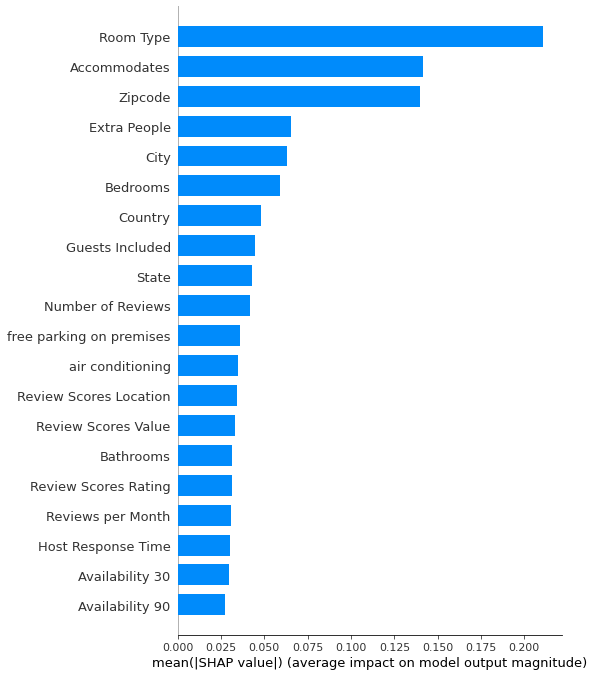

In [ ]:
import shap
# explainer = shap.DeepExplainer(nn2, X_train)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names = X.columns)

# Fits the explainer
explainer = shap.Explainer(nn2.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test[:100]).values
shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names = X.columns)